In [ ]:
#Instalação de pacotes Forecast
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
#Instalação do pacote dygraphs
install.packages("dygraphs")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘htmlwidgets’




In [ ]:
#Instalação do pacote "modeest"
install.packages("modeest")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘gss’, ‘rmutil’, ‘clue’, ‘fBasics’, ‘stable’, ‘stabledist’, ‘statip’




In [ ]:
install.packages("knitr") # Instalação do pacote "knitr"
install.packages("kableExtra") # Instalação do pacote "kableExtra"


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘webshot’




In [1]:
install.packages("WDI") # Instalação  da biblioteca World Bank

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Carregamentos de Pacotes
library(readr) # leitura de arquivos de dados, como arquivos CSV e TXT.
library(ggplot2) # criação de gráficos e visualização de dados.
library(dplyr) # manipulação de dados, incluindo filtragem, agrupamento, seleção e transformação de variáveis.
library(forecast) # modelagem e previsão de séries temporais.
library(tseries) # ferramentas para análise de séries temporais
library(zoo) # manipulação e visualização de séries temporais.
library(lubridate) # funções para manipulação de datas e horários.
library(dygraphs) # visualização interativa de séries temporais
library(TTR) # cálculo de indicadores técnicos para análise financeira.
library(quantmod) # carregamento e análise de dados financeiros.
library(modeest) # cálculo de estimativas robustas de moda para dados univariados.
library(tidyr) # manipulação de dados para organização e limpeza de tabelas.
library(knitr) # criação de relatórios dinâmicos em R.
library(kableExtra) # formatação de tabelas em relatórios criados com o knitr.
library(broom) # organização de resultados de modelos estatísticos em dataframes.
library(WDI) # World Bank

In [ ]:
# Definição da URL do arquivo
url <- "https://api.bcb.gov.br/dados/serie/bcdata.sgs.24363/dados?formato=csv&dataInicial=01/01/2009&dataFinal=31/12/2011"


In [ ]:
# Importação do arquivo CSV como data frame
df <- read.csv(url, sep = ";", dec = ".", header = TRUE, stringsAsFactors = FALSE)

In [ ]:
# Visibilidade das primeiras linhas do data frame
head(df)

,data,valor
,<chr>,<chr>
1,01/01/2009,"115,20"
2,01/02/2009,"115,26"
3,01/03/2009,"127,81"
4,01/04/2009,"123,09"
5,01/05/2009,"124,41"
6,01/06/2009,"125,61"


In [ ]:
# Definir os parâmetros para a busca dos dados do PIB
country <- "BR"  # Código do país (BR para Brasil)
indicator <- "NY.GDP.MKTP.CD"  # Código do indicador (PIB atual em dólares americanos)
start_year <- 2009
end_year <- 2011



In [ ]:
# Extrair os dados do PIB brasileiro
pib_data <- WDI(country = country, indicator = indicator, start = start_year, end = end_year)

In [ ]:
pib_data$NY.GDP.MKTP.CD <- format(pib_data$NY.GDP.MKTP.CD, scientific = FALSE, big.mark = ",", decimal.mark = ".", trim = TRUE)


In [ ]:
pib_data <- pib_data %>%
  rename(País = country,
         Código_País = iso2c,
         Código_ISO3 = iso3c,
         Ano = year,
         PIB = NY.GDP.MKTP.CD)

In [ ]:
pib_data$Ano <- as.character(pib_data$Ano)

In [ ]:
# Ordenar a tabela por Ano
pib_data <- pib_data %>%
  arrange(Ano)

In [ ]:
# Visualizar os dados do PIB
kable(pib_data, format = "markdown", align = "c") %>%
  kable_styling(full_width = FALSE, position = "center")

Warning message in kable_styling(., full_width = FALSE, position = "center"):
“Please specify format in kable. kableExtra can customize either HTML or LaTeX outputs. See https://haozhu233.github.io/kableExtra/ for details.”




|  País  | Código_País | Código_ISO3 | Ano  |        PIB        |
|:------:|:-----------:|:-----------:|:----:|:-----------------:|
| Brazil |     BR      |     BRA     | 2009 | 1,667,019,783,635 |
| Brazil |     BR      |     BRA     | 2010 | 2,208,871,646,203 |
| Brazil |     BR      |     BRA     | 2011 | 2,616,201,578,192 |

In [ ]:
str(pib_data)

 chr [1:3] "2011" "2010" "2009"


2. Faça:
a. Exiba um gráfico anual com os dados da séries temporais dos anos de 2009 a 2011;

In [ ]:
# conversão coluna "data" para formato de data
df$data <- as.Date(df$data, format = "%d/%m/%Y")

# conversão coluna "Valor" para numérica
df$valor <- as.numeric(gsub(",", ".", df$valor))


In [ ]:
# filtragem dos dados para incluir apenas anos de 2009 a 2011
df_ano <- subset(df, format(data, "%Y") %in% c("2009", "2010", "2011"))

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


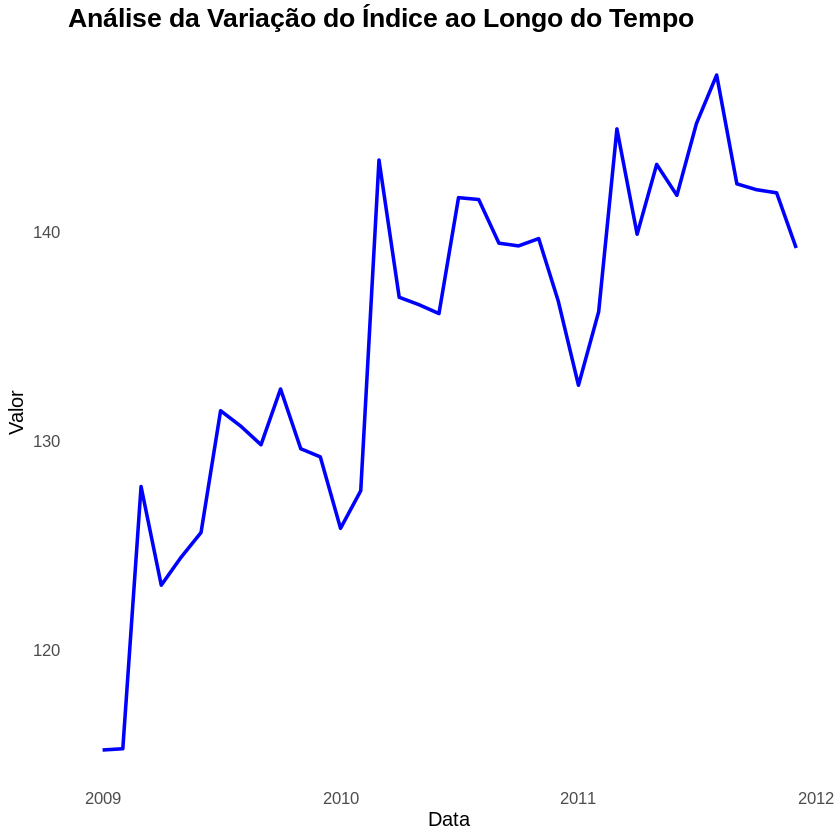

In [ ]:
# Gráfico de linhas dos valores por data:

ggplot(df_ano, aes(x = data, y = valor)) +  # Define o dataframe e mapeia as variáveis x e y
  geom_line(color = "blue", size = 1) +  # Adiciona uma linha com cor azul e espessura de 1
  labs(title = "Análise da Variação do Índice ao Longo do Tempo", x = "Data", y = "Valor") +  # Define os títulos dos eixos e título do gráfico
  theme_minimal() +  # Aplica um tema minimalista ao gráfico
  theme(
    plot.title = element_text(size = 16, face = "bold"),  # Define o tamanho e estilo do título do gráfico
    axis.title = element_text(size = 12),  # Define o tamanho dos títulos dos eixos
    axis.text = element_text(size = 10),  # Define o tamanho dos rótulos dos eixos
    panel.grid.major = element_blank(),  # Remove as linhas de grade principais
    panel.grid.minor = element_blank(),  # Remove as linhas de grade secundárias
    panel.border = element_blank(),  # Remove a borda do painel
    legend.position = "none"  # Remove a legenda
  )


b. Exiba um gráfico em barras por ano, sendo que cada barra deve ter “subbarras” mensais.

In [ ]:
# Nova coluna com mês e ano
df_ano$mes_ano <- format(df_ano$data, "%m %Y")

In [ ]:
# Ordenar os meses e anos
df_ano$mes_ano <- factor(df_ano$mes_ano, levels = unique(df_ano$mes_ano))


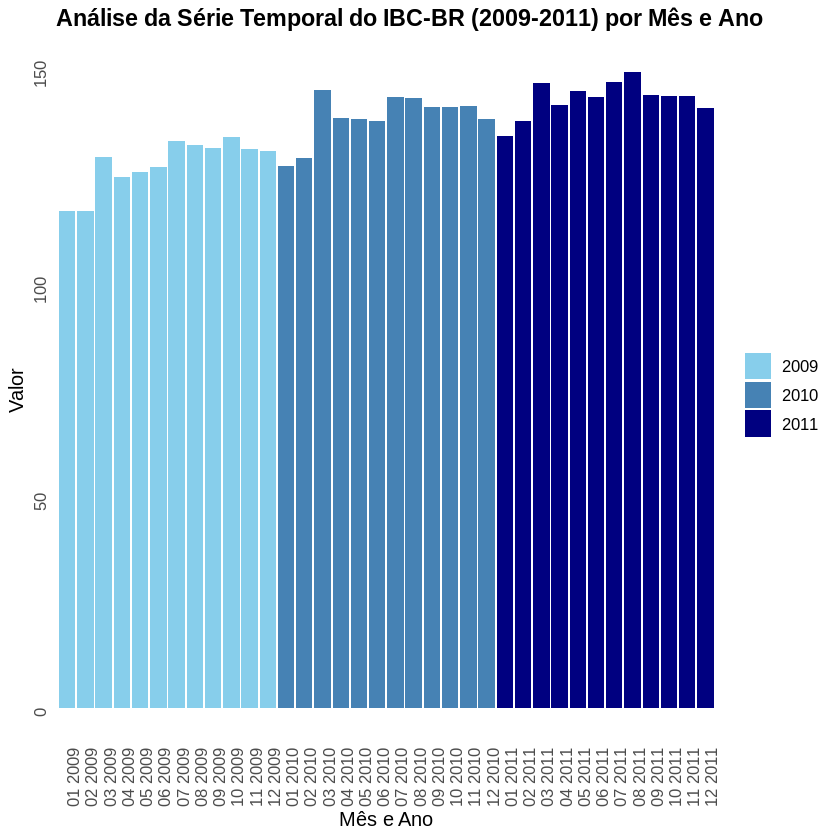

In [ ]:
# Gráfico de barras por ano com subbarras mensais
ggplot(df_ano, aes(x = mes_ano, y = valor, fill = format(data, "%Y"))) +  # Define os dados e mapeia as variáveis para os eixos
  geom_col(position = "dodge") +  # Adiciona as barras colunares com posicionamento dodge (agrupadas por categoria)
  labs(title = "Análise da Série Temporal do IBC-BR (2009-2011) por Mês e Ano", x = "Mês e Ano", y = "Valor") +  # Define os títulos dos eixos e título do gráfico
  theme_minimal() +  # Define o tema do gráfico como minimalista
  theme(plot.title = element_text(size = 14, face = "bold"),  # Define a formatação do título do gráfico
        axis.title = element_text(size = 12),  # Define a formatação dos títulos dos eixos
        axis.text = element_text(size = 10, angle = 90, hjust = 1, vjust = 0.5),  # Define a formatação do texto dos eixos (ângulo, alinhamento horizontal e vertical)
        legend.title = element_blank(),  # Remove o título da legenda
        legend.text = element_text(size = 10),  # Define a formatação do texto da legenda
        panel.grid.major = element_blank(),  # Remove as linhas de grade principais
        panel.grid.minor = element_blank(),  # Remove as linhas de grade secundárias
        panel.border = element_blank()) +  # Remove a borda do painel
  scale_fill_manual(values = c("2009" = "skyblue", "2010" = "steelblue", "2011" = "navyblue"))  # Define as cores de preenchimento manualmente para cada ano



c.  Exiba um gráfico em barras lado a lado por mês, com os dados dos anos de 2009 a 2011.

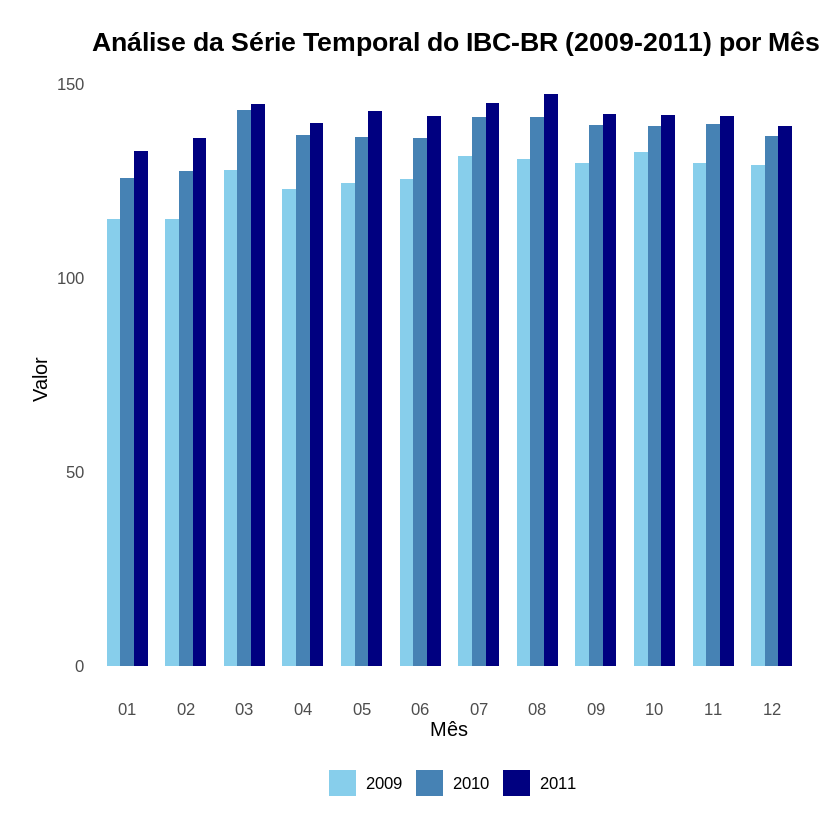

In [ ]:
# Gráfico de barras lado a lado por mês
ggplot(df_ano, aes(x = format(data, "%m"), y = valor, fill = format(data, "%Y"))) +  # Define os dados e mapeia as variáveis para os eixos
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +  # Adiciona as barras com posicionamento lado a lado e largura de 0.7
  scale_fill_manual(values = c("2009" = "skyblue", "2010" = "steelblue", "2011" = "navyblue")) +  # Define as cores de preenchimento manualmente para cada ano
  labs(title = "Análise da Série Temporal do IBC-BR (2009-2011) por Mês", x = "Mês", y = "Valor") +  # Define os títulos dos eixos e título do gráfico
  theme_minimal() +  # Define o tema do gráfico como minimalista
  theme(plot.title = element_text(size = 16, face = "bold"),  # Define a formatação do título do gráfico
        axis.title = element_text(size = 12),  # Define a formatação dos títulos dos eixos
        axis.text = element_text(size = 10),  # Define a formatação do texto dos eixos
        legend.title = element_blank(),  # Remove o título da legenda
        legend.text = element_text(size = 10),  # Define a formatação do texto da legenda
        legend.position = "bottom",  # Posiciona a legenda na parte inferior do gráfico
        panel.grid.major = element_blank(),  # Remove as linhas de grade principais
        panel.grid.minor = element_blank(),  # Remove as linhas de grade secundárias
        panel.border = element_blank(),  # Remove a borda do painel
        plot.margin = margin(20, 20, 20, 20, unit = "pt"))  # Define as margens do gráfico



Faça uma análise exploratória dos dados  (AED) anos de 2009 e 2011: por exemplo, mínimo, máximo, desvio-padrão, mediana, quartis e Outliers. Adicione outras informações relevantes.

In [ ]:
# Calcular as estatísticas descritivas para cada ano
df_estatisticas <- df_ano %>% 
  group_by(Ano = format(data, "%Y")) %>%  # Agrupa os dados por ano, usando a função format() para extrair o ano da data
  summarize(
    Minimo = min(valor),  # Calcula o valor mínimo
    Q1 = quantile(valor, 0.25),  # Calcula o primeiro quartil
    Mediana = median(valor),  # Calcula a mediana
    Media = mean(valor),  # Calcula a média
    Q3 = quantile(valor, 0.75),  # Calcula o terceiro quartil
    Maximo = max(valor),  # Calcula o valor máximo
    DesvioPadrao = sd(valor),  # Calcula o desvio padrão
    Moda = as.numeric(names(table(valor)[table(valor) == max(table(valor))]))  # Calcula a moda
  ) %>% 
  distinct(Ano, .keep_all = TRUE)  # Mantém apenas as linhas únicas para cada ano



Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'Ano'. You can override using the `.groups`
argument.


In [ ]:
df_estatisticas$PIB <- pib_data$PIB

In [ ]:
# Visualizar o data frame com as estatísticas descritivas
kable(df_estatisticas, format = "markdown", align = "c") %>%
  kable_styling(full_width = FALSE, position = "center")

Warning message in kable_styling(., full_width = FALSE, position = "center"):
“Please specify format in kable. kableExtra can customize either HTML or LaTeX outputs. See https://haozhu233.github.io/kableExtra/ for details.”




| year | Minimo |    Q1    | Mediana |  Media   |    Q3    | Maximo | DesvioPadrao |  Moda  |        PIB        |
|:----:|:------:|:--------:|:-------:|:--------:|:--------:|:------:|:------------:|:------:|:-----------------:|
| 2009 | 115.20 | 124.0800 | 128.520 | 126.2217 | 130.0325 | 132.48 |   5.858558   | 115.20 | 1,667,019,783,635 |
| 2010 | 125.81 | 136.4125 | 138.100 | 137.0575 | 140.1475 | 143.44 |   5.367314   | 125.81 | 2,208,871,646,203 |
| 2011 | 132.66 | 139.7250 | 141.945 | 141.3967 | 143.6550 | 147.51 |   4.041474   | 132.66 | 2,616,201,578,192 |

In [ ]:
# Calcular as estatísticas descritivas para cada mês
df_estatisticas_mes <- df %>%
  group_by(Mes = format(data, "%m")) %>%
  summarize(
    Minimo = min(valor),
    Q1 = quantile(valor, 0.25),
    Mediana = median(valor),
    Media = mean(valor),
    Q3 = quantile(valor, 0.75),
    Maximo = max(valor),
    DesvioPadrao = sd(valor),
    Moda = as.numeric(names(table(valor)[table(valor) == max(table(valor))]))
  ) %>%
  distinct(Mes, .keep_all = TRUE)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'Mes'. You can override using the `.groups`
argument.


In [ ]:
# Visualizar o data frame com as estatísticas descritivas
kable(df_estatisticas_mes, format = "markdown", align = "c") %>%
  kable_styling(full_width = FALSE, position = "center")

Warning message in kable_styling(., full_width = FALSE, position = "center"):
“Please specify format in kable. kableExtra can customize either HTML or LaTeX outputs. See https://haozhu233.github.io/kableExtra/ for details.”




| Mes | Minimo |    Q1    | Mediana |  Media   |    Q3    | Maximo | DesvioPadrao |  Moda  |
|:---:|:------:|:--------:|:-------:|:--------:|:--------:|:------:|:------------:|:------:|
| 01  | 125.81 | 127.5225 | 129.235 | 129.2350 | 130.9475 | 132.66 |   4.843681   | 125.81 |
| 02  | 115.26 | 121.4350 | 127.610 | 126.3500 | 131.8950 | 136.18 |  10.516763   | 115.26 |
| 03  | 127.81 | 135.6250 | 143.440 | 138.7267 | 144.1850 | 144.93 |   9.483419   | 127.81 |
| 04  | 123.09 | 129.9800 | 136.870 | 133.2833 | 138.3800 | 139.89 |   8.955899   | 123.09 |
| 05  | 124.41 | 130.4650 | 136.520 | 134.7200 | 139.8750 | 143.23 |   9.538244   | 124.41 |
| 06  | 125.61 | 130.8500 | 136.090 | 134.4833 | 138.9200 | 141.75 |   8.189074   | 125.61 |
| 07  | 131.44 | 136.5400 | 141.640 | 139.4233 | 143.4150 | 145.19 |   7.137985   | 131.44 |
| 08  | 130.70 | 136.1250 | 141.550 | 139.9200 | 144.5300 | 147.51 |   8.522717   | 130.70 |
| 09  | 129.81 | 134.6350 | 139.460 | 137.1900 | 140.8800 | 142.30 |

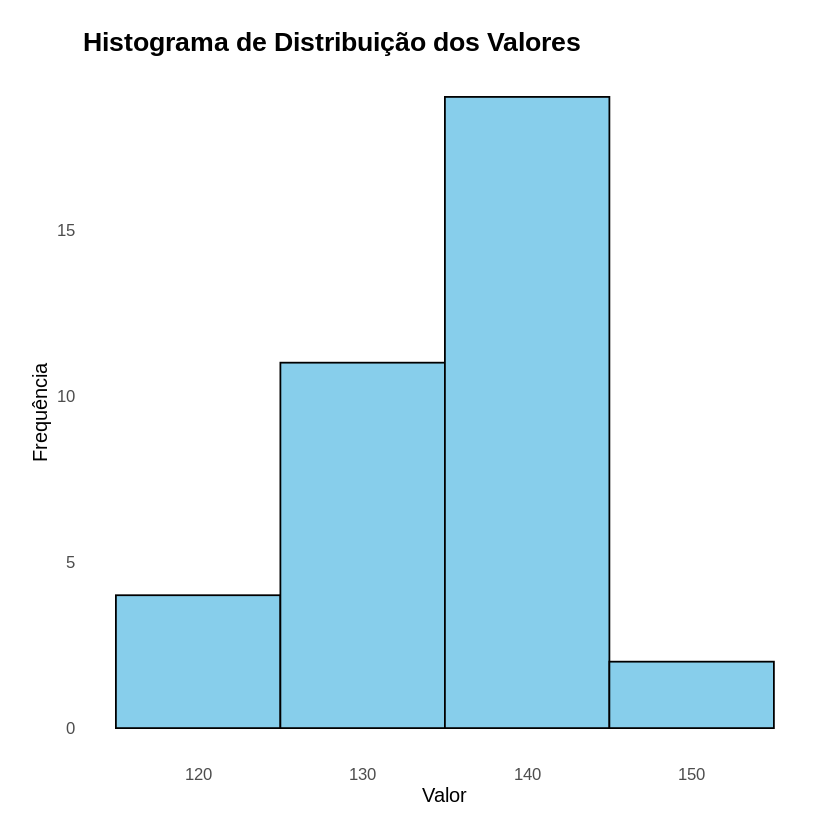

In [ ]:
# Histograma dos valores
ggplot(df_ano, aes(x = valor)) +
  geom_histogram(binwidth = 10, fill = "skyblue", color = "black") +  # Cria o histograma com largura de intervalo de 10 unidades, preenchimento em azul céu e borda preta
  labs(title = "Histograma de Distribuição dos Valores", x = "Valor", y = "Frequência") +  # Define os títulos dos eixos x e y e o título do gráfico
  theme_minimal() +  # Define o tema do gráfico como minimalista
  theme(plot.title = element_text(size = 16, face = "bold"),  # Formata o título do gráfico
        axis.title = element_text(size = 12),  # Formata os títulos dos eixos
        axis.text = element_text(size = 10),  # Formata o texto dos eixos
        legend.position = "none",  # Remove a legenda
        panel.grid.major = element_blank(),  # Remove as linhas de grade principais
        panel.grid.minor = element_blank(),  # Remove as linhas de grade secundárias
        panel.border = element_blank(),  # Remove a borda do painel
        plot.margin = margin(20, 20, 20, 20, unit = "pt"))  # Define as margens do gráfico



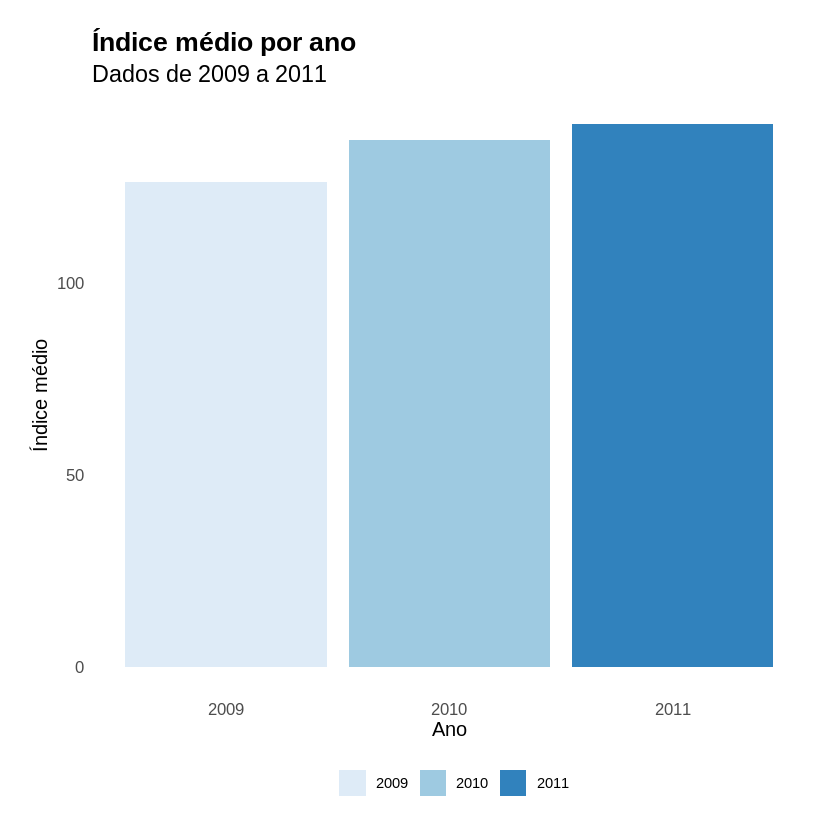

In [ ]:
# Gráfico de barras da média dos valores por ano
df_ano %>% 
  group_by(ano = format(data, "%Y")) %>%  # Agrupa os dados por ano, convertendo a coluna de data para o formato de ano
  summarise(media_valor = mean(valor)) %>%  # Calcula a média dos valores para cada ano
  ggplot(aes(x = ano, y = media_valor, fill = ano)) +  # Define os dados a serem utilizados no gráfico e mapeia o preenchimento com base no ano
  geom_bar(stat = "identity", position = "dodge") +  # Cria o gráfico de barras com posição side-by-side (dodge)
  scale_fill_brewer(palette = "Blues") +  # Define a paleta de cores para preenchimento das barras
  labs(title = "Índice médio por ano",  # Define o título do gráfico
       subtitle = "Dados de 2009 a 2011",  # Define o subtítulo do gráfico
       x = "Ano",  # Define o rótulo do eixo x
       y = "Índice médio") +  # Define o rótulo do eixo y
  theme_minimal() +  # Define o tema do gráfico como minimalista
  theme(plot.title = element_text(size = 16, face = "bold"),  # Formata o título do gráfico
        plot.subtitle = element_text(size = 14),  # Formata o subtítulo do gráfico
        axis.title = element_text(size = 12),  # Formata os títulos dos eixos
        axis.text = element_text(size = 10),  # Formata o texto dos eixos
        legend.position = "bottom",  # Posiciona a legenda na parte inferior do gráfico
        legend.title = element_blank(),  # Remove o título da legenda
        panel.grid.major = element_blank(),  # Remove as linhas de grade principais
        panel.grid.minor = element_blank(),  # Remove as linhas de grade secundárias
        panel.border = element_blank(),  # Remove a borda do painel
        plot.margin = margin(20, 20, 20, 20, unit = "pt"))  # Define as margens do gráfico



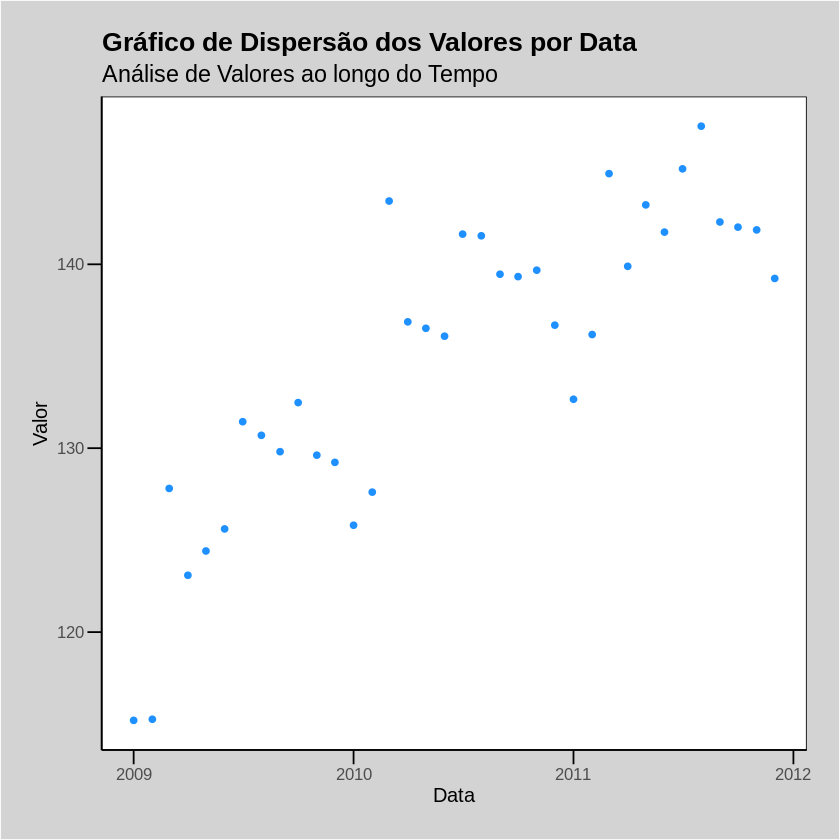

In [ ]:
# Gráfico de dispersão dos valores por data
ggplot(df_ano, aes(x = data, y = valor)) +  # Define os dados a serem utilizados no gráfico e mapeia os eixos x e y
  geom_point(color = "dodgerblue") +  # Cria os pontos do gráfico com cor "dodgerblue"
  labs(title = "Gráfico de Dispersão dos Valores por Data",  # Define o título do gráfico
       subtitle = "Análise de Valores ao longo do Tempo",  # Define o subtítulo do gráfico
       x = "Data",  # Define o rótulo do eixo x
       y = "Valor") +  # Define o rótulo do eixo y
  theme_minimal() +  # Define o tema do gráfico como minimalista
  theme(plot.title = element_text(size = 16, face = "bold"),  # Formata o título do gráfico
        plot.subtitle = element_text(size = 14),  # Formata o subtítulo do gráfico
        axis.title = element_text(size = 12),  # Formata os títulos dos eixos
        axis.text = element_text(size = 10),  # Formata o texto dos eixos
        legend.position = "none",  # Remove a legenda
        panel.grid.major = element_blank(),  # Remove as linhas de grade principais
        panel.grid.minor = element_blank(),  # Remove as linhas de grade secundárias
        panel.border = element_blank(),  # Remove a borda do painel
        plot.margin = margin(20, 20, 20, 20, unit = "pt"),  # Define as margens do gráfico
        plot.background = element_rect(fill = "lightgray", color = "white"),  # Define o fundo do gráfico
        panel.background = element_rect(fill = "white"),  # Define o fundo do painel
        panel.grid = element_line(color = "gray"),  # Define as linhas de grade do painel
        axis.line = element_line(color = "black"),  # Define a cor da linha dos eixos
        axis.ticks = element_line(color = "black"),  # Define a cor dos ticks dos eixos
        axis.ticks.length = unit(0.3, "cm"),  # Define o comprimento dos ticks dos eixos
        legend.background = element_rect(fill = "white"),  # Define o fundo da legenda
        legend.title = element_text(size = 12, face = "bold"),  # Formata o título da legenda
        legend.text = element_text(size = 10),  # Formata o texto da legenda
        legend.key = element_rect(color = "white"),  # Define a cor da caixa da legenda
        legend.key.size = unit(1.2, "lines"),  # Define o tamanho da caixa da legenda
        legend.key.width = unit(1.2, "lines"),  # Define a largura da caixa da legenda
        plot.caption = element_text(size = 10, hjust = 0))  # Formata o texto da legenda




In [ ]:
# Identificação de valores ausentes
sum(is.na(df_ano$valor))


[1] 0

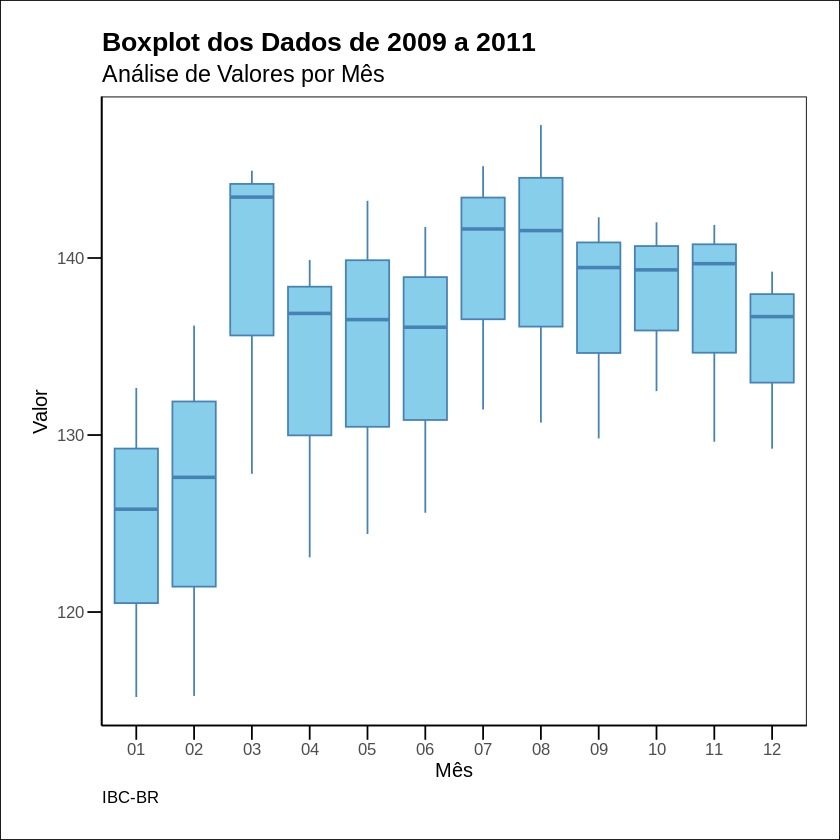

In [ ]:
# Boxplot dos dados de 2009 a 2011
ggplot(data = df_ano, aes(x = format(data, "%m"), y = valor)) +  # Define os dados a serem utilizados no gráfico e mapeia os eixos x e y
  geom_boxplot(fill = "skyblue", color = "steelblue", outlier.color = "darkblue", outlier.shape = 16) +  # Cria o boxplot com as cores e formas definidas
  scale_x_discrete(name = "Mês") +  # Define a escala do eixo x como discreta e adiciona o rótulo "Mês"
  scale_y_continuous(name = "Valor") +  # Define a escala do eixo y como contínua e adiciona o rótulo "Valor"
  labs(title = "Boxplot dos Dados de 2009 a 2011",  # Define o título do gráfico
       subtitle = "Análise de Valores por Mês",  # Define o subtítulo do gráfico
       caption = "IBC-BR") +  # Define a legenda do gráfico
  theme_minimal() +  # Define o tema do gráfico como minimalista
  theme(plot.title = element_text(size = 16, face = "bold"),  # Formata o título do gráfico
        plot.subtitle = element_text(size = 14),  # Formata o subtítulo do gráfico
        axis.title = element_text(size = 12),  # Formata os títulos dos eixos
        axis.text = element_text(size = 10),  # Formata o texto dos eixos
        legend.position = "none",  # Remove a legenda
        panel.grid.major = element_blank(),  # Remove as linhas de grade principais
        panel.grid.minor = element_blank(),  # Remove as linhas de grade secundárias
        panel.border = element_blank(),  # Remove a borda do painel
        plot.margin = margin(20, 20, 20, 20, unit = "pt"),  # Define as margens do gráfico
        plot.background = element_rect(fill = "white"),  # Define o fundo do gráfico
        panel.background = element_rect(fill = "white"),  # Define o fundo do painel
        panel.grid = element_line(color = "gray"),  # Define as linhas de grade do painel
        axis.line = element_line(color = "black"),  # Define a cor da linha dos eixos
        axis.ticks = element_line(color = "black"),  # Define a cor dos ticks dos eixos
        axis.ticks.length = unit(0.3, "cm"),  # Define o comprimento dos ticks dos eixos
        legend.background = element_rect(fill = "white"),  # Define o fundo da legenda
        legend.title = element_text(size = 12, face = "bold"),  # Formata o título da legenda
        legend.text = element_text(size = 10),  # Formata o texto da legenda
        legend.key = element_rect(color = "white"),  # Define a cor da caixa da legenda
        legend.key.size = unit(1.2, "lines"),  # Define o tamanho da caixa da legenda
        legend.key.width = unit(1.2, "lines"),  # Define a largura da caixa da legenda
        plot.caption = element_text(size = 10, hjust = 0))  # Formata o texto da legenda


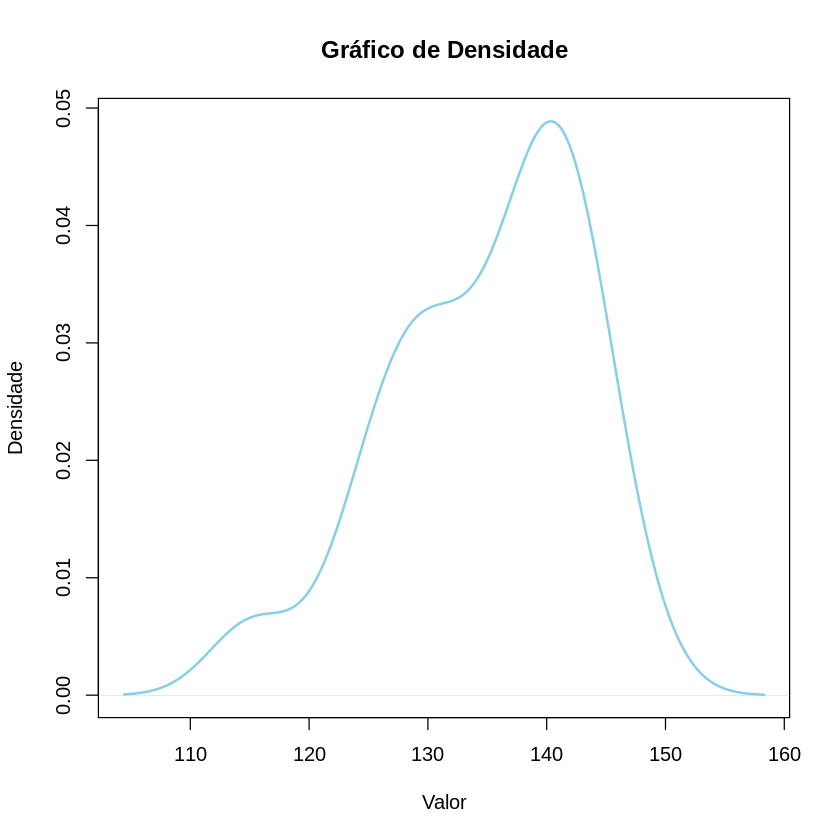

In [ ]:
# Gráfico de densidade
plot(density(df$valor), col = "skyblue", lwd = 2, main = "Gráfico de Densidade", xlab = "Valor", ylab = "Densidade")


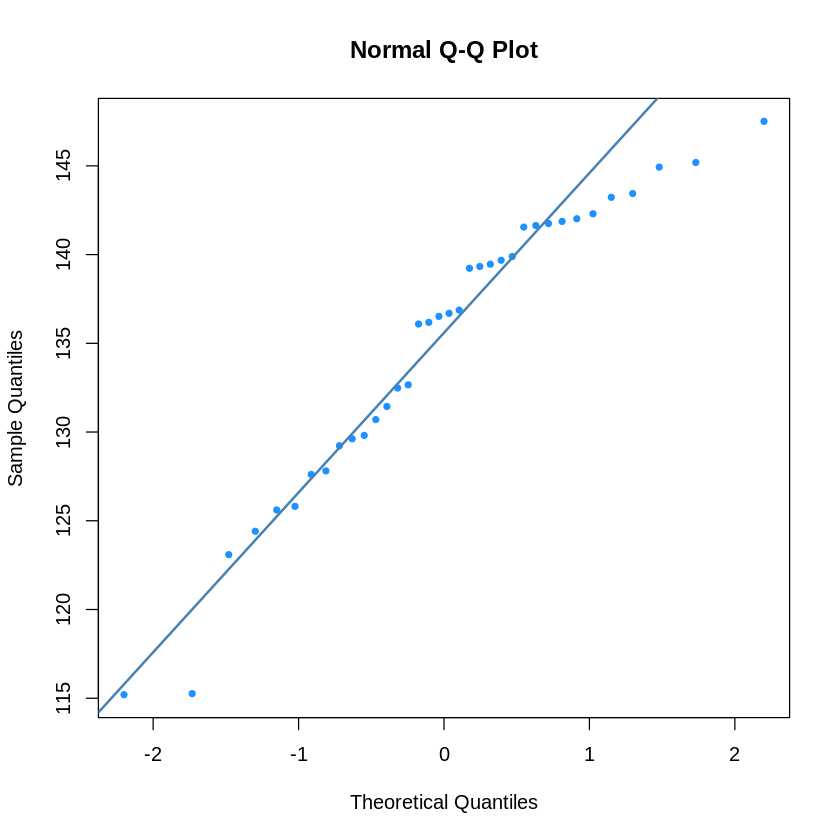

In [ ]:
# Gráfico de normalidade
qqnorm(df$valor, col = "dodgerblue", pch = 20)
qqline(df$valor, col = "steelblue", lwd = 2)



4. Calcule e exiba:
a.	Regressão linear dos dados dos anos 2010 e 2011

In [ ]:
# Filtrar dados para incluir apenas anos de 2010 e 2011
df_ano_1011 <- subset(df_ano, format(data, "%Y") %in% c("2010", "2011"))

# Ajustar modelo de regressão linear
modelo <- lm(valor ~ data, data = df_ano_1011)

# Exibir resumo da regressão
summary(modelo)



Call:
lm(formula = valor ~ data, data = df_ano_1011)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4982 -1.9819  0.3448  2.3611  8.3003 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -71.610474  61.700689  -1.161  0.25824   
data          0.014094   0.004124   3.417  0.00247 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.254 on 22 degrees of freedom
Multiple R-squared:  0.3468,	Adjusted R-squared:  0.3171 
F-statistic: 11.68 on 1 and 22 DF,  p-value: 0.002466


`geom_smooth()` using formula = 'y ~ x'


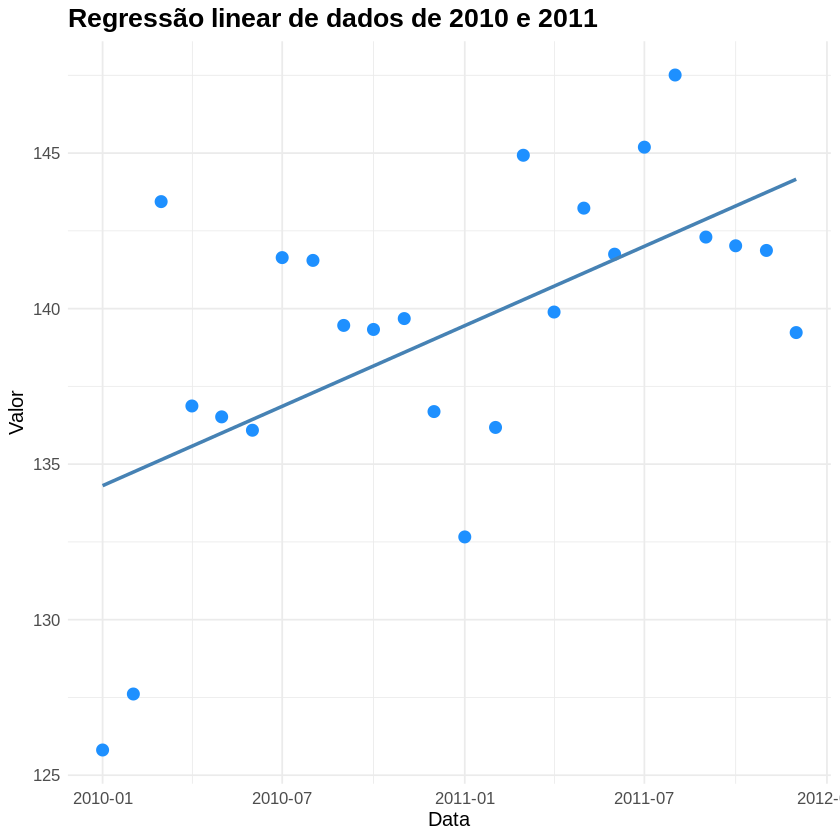

In [ ]:
# Gráfico da regressão
ggplot(data = df_ano_1011, aes(x = data, y = valor)) +  # Define os dados a serem utilizados no gráfico e mapeia os eixos x e y
  geom_point(color = "dodgerblue", size = 3) +  # Adiciona pontos ao gráfico com cor e tamanho definidos
  geom_smooth(method = "lm", se = FALSE, color = "steelblue", linetype = "solid") +  # Adiciona uma linha de regressão linear ao gráfico com cor e tipo de linha definidos
  labs(title = "Regressão linear de dados de 2010 e 2011", x = "Data", y = "Valor") +  # Define o título e rótulos dos eixos do gráfico
  theme_minimal() +  # Define o tema do gráfico como minimalista
  theme(plot.title = element_text(size = 16, face = "bold"),  # Formata o título do gráfico
        axis.title = element_text(size = 12),  # Formata os títulos dos eixos
        axis.text = element_text(size = 10)) +  # Formata o texto dos eixos
  scale_color_manual(values = c("dodgerblue"))  # Define a cor dos pontos no gráfico




In [ ]:
# Filtragem de dados para incluir apenas anos de 2010 e 2011
df_ano_1011 <- subset(df_ano, format(data, "%Y") %in% c("2010", "2011"))

# Ajuste do modelo de regressão polinomial de grau 2
modelo_poli <- lm(valor ~ poly(data, 2), data = df_ano_1011)

# Resumo do modelo utilizando a função tidy() do pacote broom
resumo <- tidy(modelo_poli)

# Exibição do resumo
resumo




term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),139.227083,0.8434646,165.065706,3.505987e-34
"poly(data, 2)1",14.538469,4.1321159,3.518408,2.041721e-03
"poly(data, 2)2",-6.292726,4.1321159,-1.522882,1.427057e-01


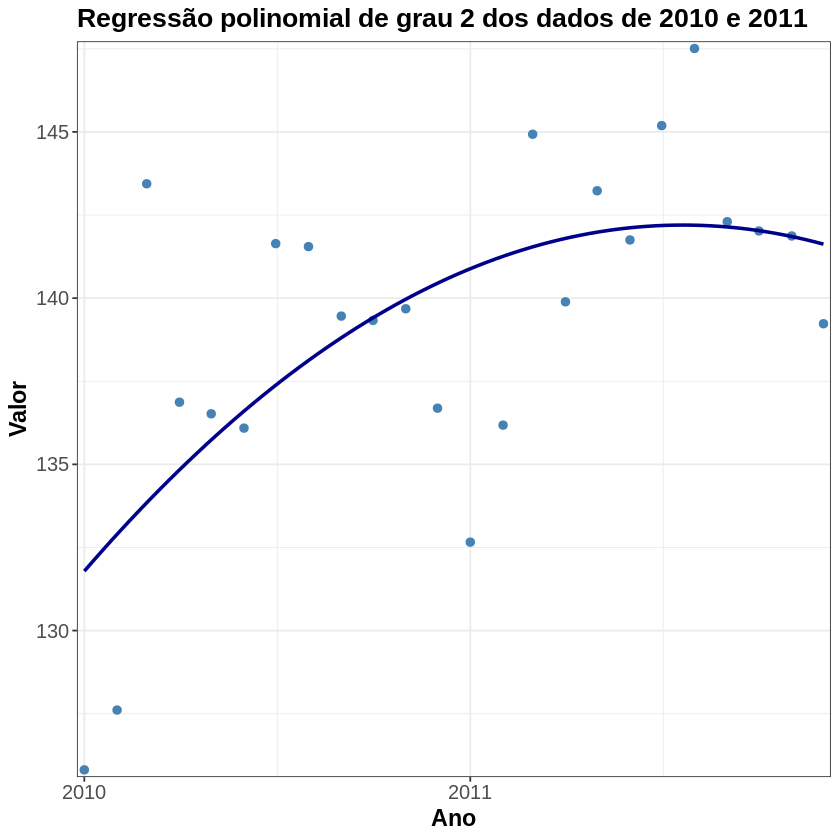

In [ ]:
# plotagem do gráfico dos dados e curva de regressão polinomial
ggplot(df_ano_1011, aes(x = data, y = valor)) +  # Define os dados a serem utilizados no gráfico e mapeia os eixos x e y
  geom_point(color = "steelblue", size = 2) +  # Adiciona pontos ao gráfico com cor e tamanho definidos
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), se = FALSE, color = "darkblue", size = 1) +  # Adiciona uma curva de regressão polinomial de grau 2 ao gráfico com cor e espessura definidos
  scale_x_date(date_labels = "%Y", date_breaks = "1 year", expand = c(0.01, 0)) +  # Define a formatação do eixo x como datas com intervalo de 1 ano e expansão dos limites do eixo
  scale_y_continuous(name = "Valor", expand = c(0.01, 0)) +  # Define o título do eixo y e a expansão dos limites do eixo
  labs(title = "Regressão polinomial de grau 2 dos dados de 2010 e 2011", x = "Ano", y = "Valor") +  # Define o título e rótulos dos eixos do gráfico
  theme_bw() +  # Define o tema do gráfico como preto e branco
  theme(plot.title = element_text(face = "bold", size = 16),  # Formata o título do gráfico
        axis.title = element_text(face = "bold", size = 14),  # Formata os títulos dos eixos
        axis.text = element_text(size = 12),  # Formata o texto dos eixos
        legend.position = "none")  # Remove a legenda do gráfico


Adicional: Série temporal

In [ ]:
# Função para converter data frame em série temporal
converter_para_serie_temporal <- function(df, valor_coluna, data_coluna) {
  ts(df[[valor_coluna]], start = c(min(df[[data_coluna]]), 1), frequency = 12)
}

In [ ]:
# Usando a função para converter o data frame em série temporal
serie_temporal <- converter_para_serie_temporal(df_ano, "valor", "data")

In [ ]:
# Realizar a decomposição da série temporal
decomposed <- decompose(serie_temporal)

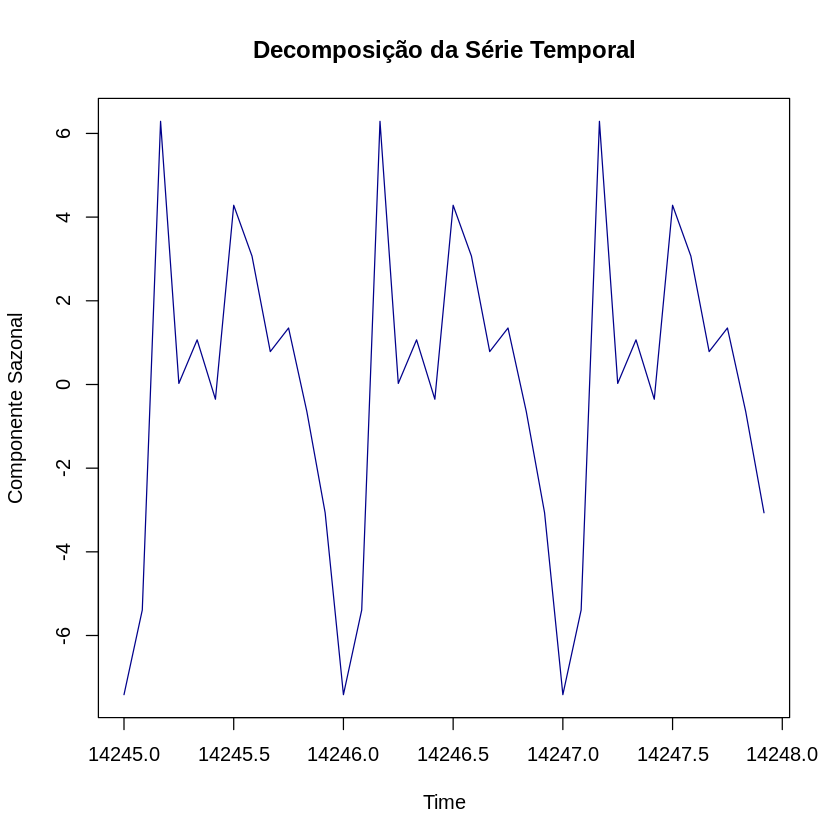

In [ ]:
# Plotar a componente sazonal com cores personalizadas
plot(decomposed$seasonal, col = "darkblue", main = "Decomposição da Série Temporal",
     ylab = "Componente Sazonal")

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“plot type 'seasonal' will be truncated to first character”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“plot type 'seasonal' will be truncated to first character”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“plot type 'seasonal' will be truncated to first character”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“plot type 'seasonal' will be truncated to first character”


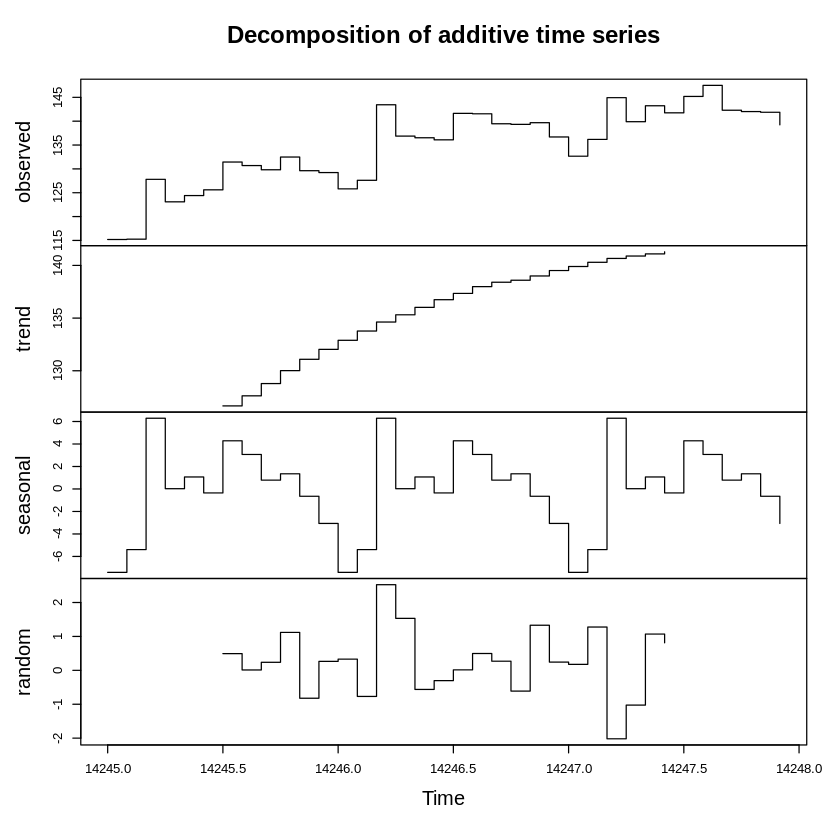

In [ ]:
# Gráfico de decomposição com componentes sazonais
plot(decompose(serie_temporal), type = "seasonal")


In [ ]:
# Ajustar o modelo ARIMA aos seus dados
modelo_arima <- auto.arima(df$valor)

In [ ]:

# Realizar a previsão com intervalos de confiança
forecast_result <- forecast(modelo_arima, h = 12)

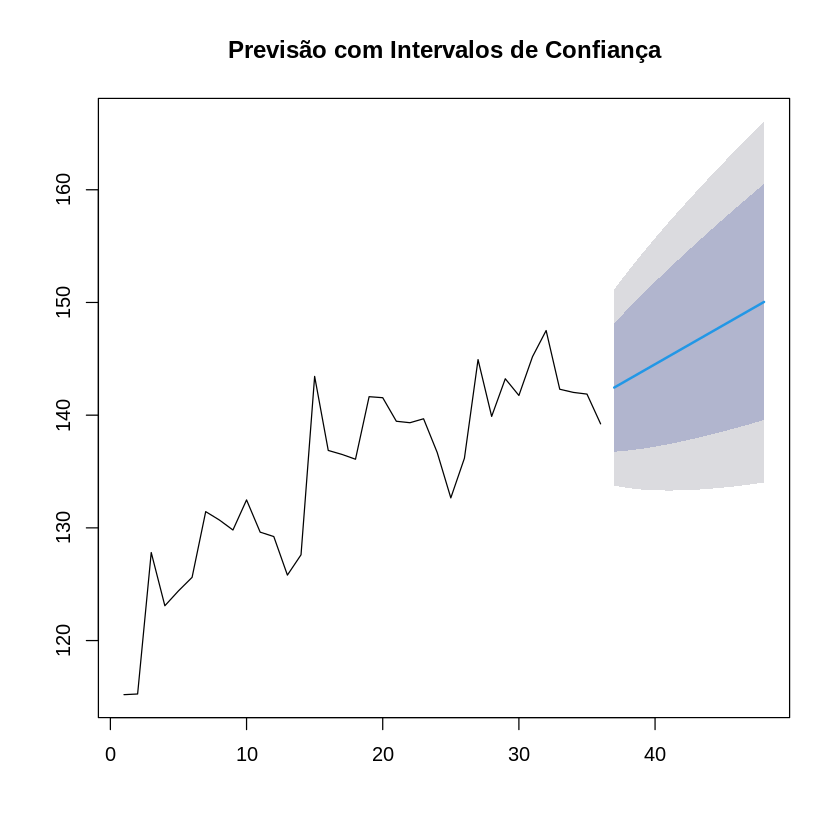

In [ ]:
# Plotar o gráfico de previsão com intervalos de confiança
plot(forecast_result, main = "Previsão com Intervalos de Confiança")

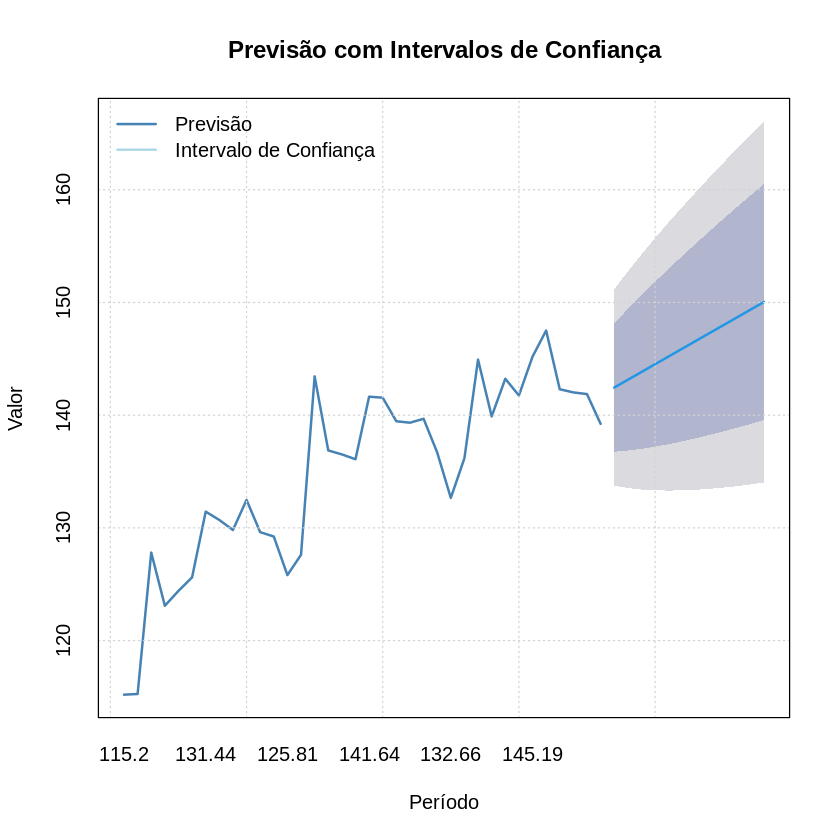

In [ ]:
# Verificação de dados faltantes ou inválidos antes de converter em série temporal
if (any(is.na(df_ano$valor)) || any(df_ano$valor <= 0)) {  # Verifica se existem valores faltantes ou inválidos na coluna "valor"
  stop("Dados faltantes ou inválidos encontrados na coluna de valores.")  # Gera um erro e interrompe a execução caso haja valores faltantes ou inválidos
}

# Verificação de erros ao fazer previsões
tryCatch(
  {
    previsao_arima <- forecast(modelo_arima, h = 12)  # Faz a previsão com base no modelo ARIMA e define a quantidade de períodos de previsão como 12
    plot(previsao_arima, main = "Previsão com Intervalos de Confiança",
         xlab = "Período", ylab = "Valor",
         col = "steelblue", lwd = 2, type = "l", ylim = c(min(previsao_arima$x), max(previsao_arima$upper)),  # Plota a previsão com intervalos de confiança
         xaxt = "n", yaxt = "n", frame.plot = FALSE)  # Configurações do gráfico
    grid(col = "lightgray")  # Adiciona uma grade no gráfico com cor "lightgray"
    axis(1, at = seq_along(previsao_arima$x), labels = previsao_arima$x, tick = FALSE)  # Configura o eixo x do gráfico
    axis(2, tick = FALSE)  # Configura o eixo y do gráfico
    box()  # Adiciona uma caixa ao redor do gráfico
    legend("topleft", legend = c("Previsão", "Intervalo de Confiança"),
           col = c("steelblue", "lightblue"), lwd = c(2, 2), bty = "n")  # Adiciona uma legenda no canto superior esquerdo do gráfico
  },
  error = function(e) {
    warning("Ocorreu um erro ao fazer previsões:", e$message)  # Gera um aviso caso ocorra um erro durante a previsão
  }
)




Adicional: Outras colunas

In [ ]:
# Adição da coluna de taxa de crescimento e formatação como porcentagem
df <- df %>%
  mutate(taxa_crescimento = sprintf("%.2f%%", (valor / lag(valor) - 1) * 100))
# Adição da coluna de media movel
df$media_movel <- rollmean(df$valor, k = 12, align = "right", fill = NA)
# Adição da coluna de diferença entre o valor e a média móvel 
df$diferenca <- df$valor - df$media_movel
# Adição da coluna de variação percentual em relação ao ano anterior e formatação como porcentagem
df$var_pct_ano_anterior <- sprintf("%.2f%%", ((df$valor / lag(df$valor, 12)) - 1) * 100)
# Adição da coluna de variação percentual em relação ao ano anterior e formatação como porcentagem
df$var_pct_mes_anterior <- sprintf("%.2f%%", ((df$valor / lag(df$valor)) - 1) * 100)
# Criando a coluna trimestre_ano
df$trimestre_ano <- paste0(year(df$data), "-Q", quarter(df$data))
# Criando a coluna semestre_ano
df$semestre_ano <- paste0(year(df$data), "-S", ifelse(month(df$data) <= 6, 1, 2))

In [ ]:
# Visibilidade das primeiras linhas do data frame com adição das novas colunas
head(df)

,data,valor,taxa_crescimento,media_movel,diferenca,var_pct_ano_anterior,var_pct_mes_anterior,trimestre_ano,semestre_ano
,<date>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,2009-01-01,115.20,NA%,NA,NA,NA%,NA%,2009-Q1,2009-S1
2,2009-02-01,115.26,0.05%,NA,NA,NA%,0.05%,2009-Q1,2009-S1
3,2009-03-01,127.81,10.89%,NA,NA,NA%,10.89%,2009-Q1,2009-S1
4,2009-04-01,123.09,-3.69%,NA,NA,NA%,-3.69%,2009-Q2,2009-S1
5,2009-05-01,124.41,1.07%,NA,NA,NA%,1.07%,2009-Q2,2009-S1
6,2009-06-01,125.61,0.96%,NA,NA,NA%,0.96%,2009-Q2,2009-S1


Warning message:
“Removed 11 rows containing missing values (`geom_line()`).”


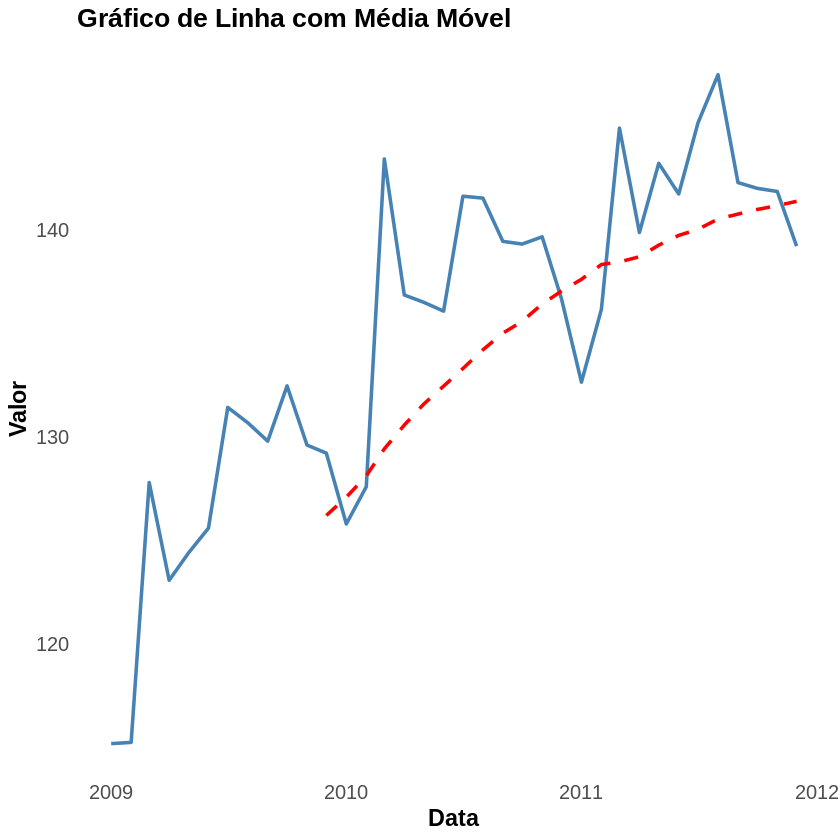

In [ ]:
# Visualização da tendência dos dados de forma mais suave com a média móvel
ggplot(df, aes(x = data)) +  # Define o dataframe e o mapeamento estético dos dados
  geom_line(aes(y = valor), color = "steelblue", size = 1) +  # Adiciona uma linha para os valores originais com cor e tamanho definidos
  geom_line(aes(y = media_movel), color = "red", size = 1, linetype = "dashed") +  # Adiciona uma linha para a média móvel com cor, tamanho e tipo de linha definidos
  labs(title = "Gráfico de Linha com Média Móvel", x = "Data", y = "Valor") +  # Define os títulos dos eixos e o título do gráfico
  theme_minimal() +  # Aplica um tema minimalista ao gráfico
  theme(
    plot.title = element_text(face = "bold", size = 16),  # Define a formatação do título do gráfico
    axis.title = element_text(face = "bold", size = 14),  # Define a formatação dos títulos dos eixos
    axis.text = element_text(size = 12),  # Define a formatação dos rótulos dos eixos
    legend.title = element_blank(),  # Remove o título da legenda
    legend.text = element_text(size = 12),  # Define a formatação do texto da legenda
    legend.position = "top",  # Posiciona a legenda no topo do gráfico
    panel.grid.major = element_blank(),  # Remove as linhas da grade principal
    panel.grid.minor = element_blank()  # Remove as linhas da grade secundária
  )


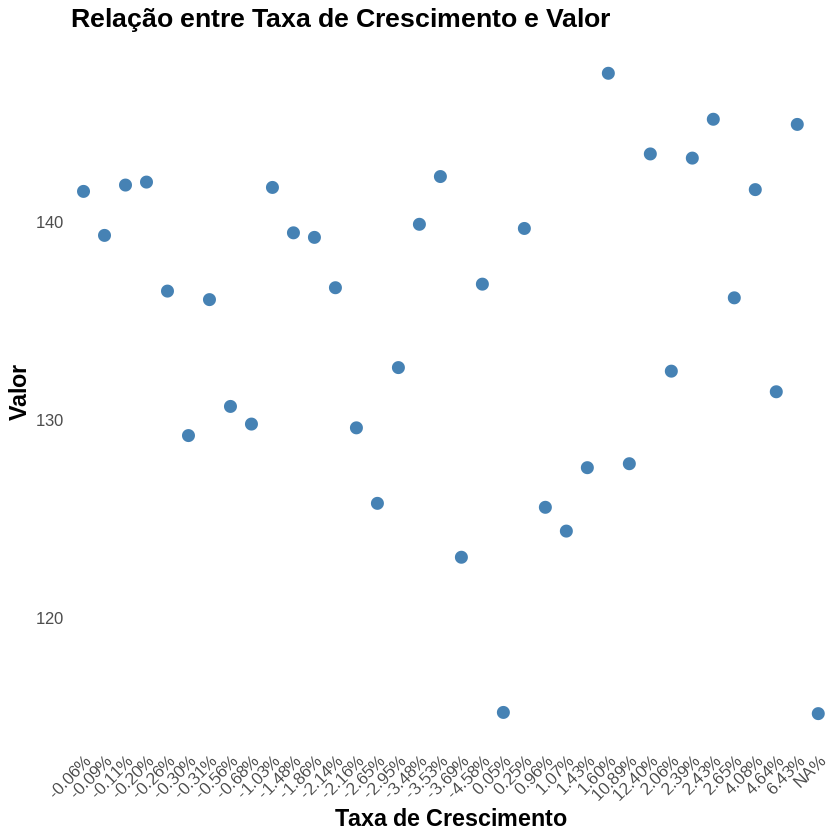

In [ ]:
# Gráfico de dispersão com a coluna "valor" no eixo y e a coluna "taxa de crescimento" no eixo x
ggplot(df, aes(x = taxa_crescimento, y = valor)) +  # Define o dataframe e o mapeamento estético dos dados
  geom_point(color = "steelblue", size = 3) +  # Adiciona pontos com cor e tamanho definidos
  labs(x = "Taxa de Crescimento", y = "Valor") +  # Define os títulos dos eixos
  ggtitle("Relação entre Taxa de Crescimento e Valor") +  # Define o título do gráfico
  theme_minimal() +  # Aplica um tema minimalista ao gráfico
  theme(
    plot.title = element_text(face = "bold", size = 16),  # Define a formatação do título do gráfico
    axis.title = element_text(face = "bold", size = 14),  # Define a formatação dos títulos dos eixos
    axis.text = element_text(size = 10),  # Define a formatação dos rótulos dos eixos
    axis.text.x = element_text(angle = 45, hjust = 1),  # Define a formatação dos rótulos do eixo x com rotação e alinhamento específicos
    legend.text = element_text(angle = 90, hjust = 0.5),  # Define a formatação do texto da legenda com rotação e alinhamento específicos
    panel.grid.major = element_blank(),  # Remove as linhas da grade principal
    panel.grid.minor = element_blank()  # Remove as linhas da grade secundária
  )

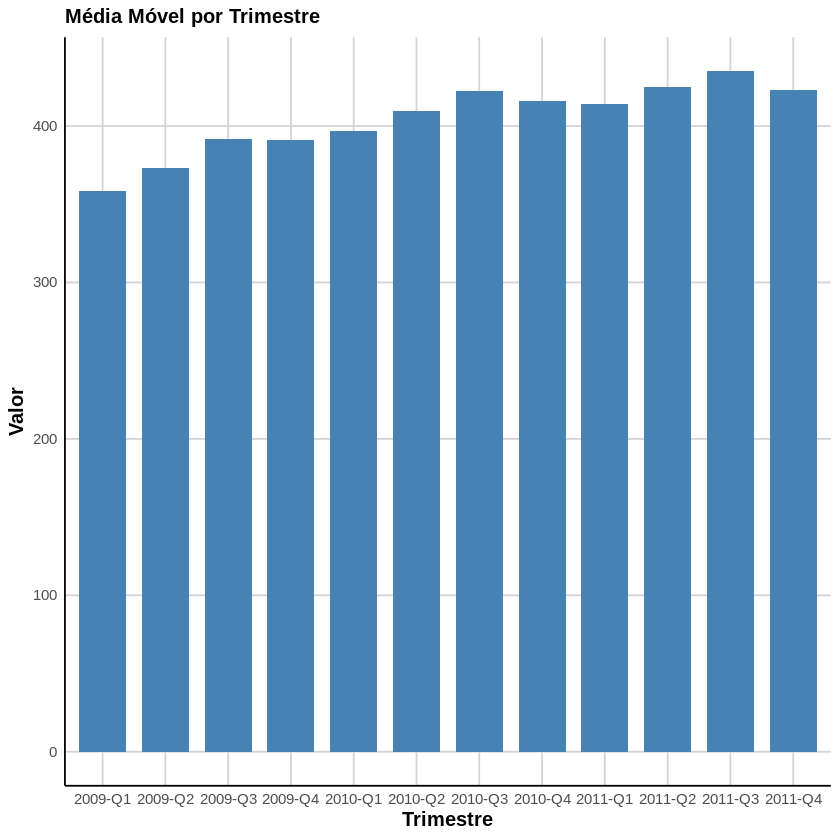

In [ ]:
# Criando o gráfico de barras com média móvel por trimestre
ggplot(df, aes(x = trimestre_ano, y = valor)) +
  geom_bar(stat = "identity", fill = "steelblue", width = 0.75) +  # Definindo cor e largura das barras
  labs(x = "Trimestre", y = "Valor", title = "Média Móvel por Trimestre") +
  theme_minimal() +  # Estilo minimalista do tema
  theme(
    plot.title = element_text(face = "bold", size = 12),  # Configuração do título
    axis.title = element_text(face = "bold", size = 12),  # Configuração dos rótulos dos eixos
    axis.text = element_text(size = 9),  # Configuração do tamanho dos textos dos eixos
    panel.grid.major = element_line(color = "lightgray"),  # Adicionando linhas de grade leves
    panel.grid.minor = element_blank(),  # Removendo linhas de grade menores
    axis.line = element_line(color = "black"),  # Cor da linha dos eixos
    legend.position = "none"  # Removendo a legenda
  )




In [ ]:
# Calcular as médias do valor por semestre
media_por_semestre <- df %>%
  group_by(semestre_ano) %>%
  summarize(media_valor = mean(valor))

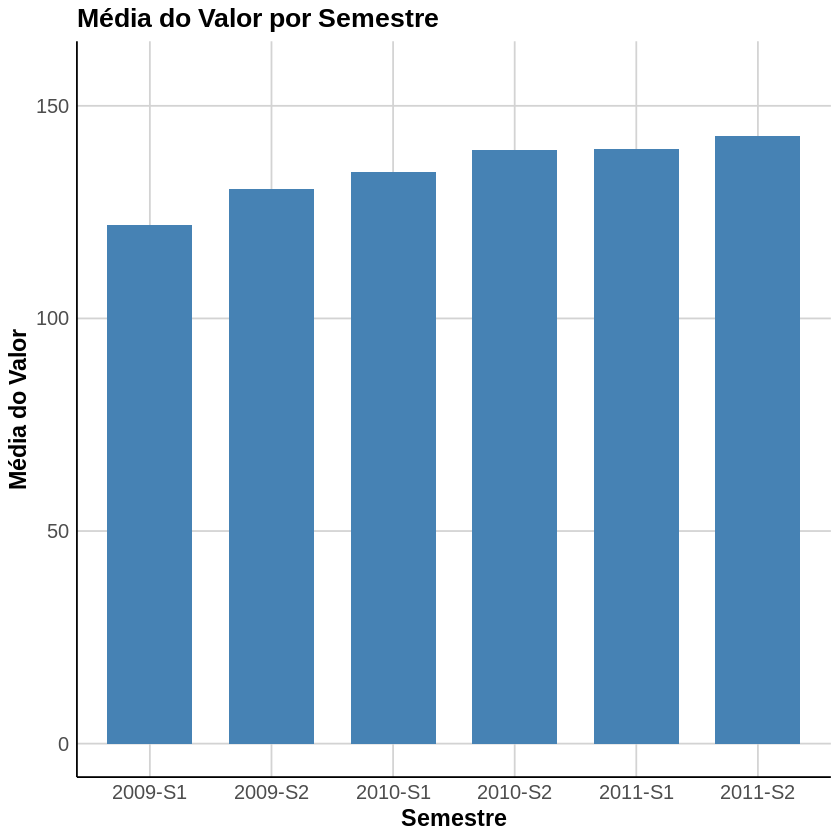

In [ ]:
# Criar o gráfico de barras
ggplot(media_por_semestre, aes(x = semestre_ano, y = media_valor)) +
  geom_bar(stat = "identity", fill = "steelblue", width = 0.7) +  # Definir cor e largura das barras
  labs(x = "Semestre", y = "Média do Valor", title = "Média do Valor por Semestre") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 16),  # Configurar título
    axis.title = element_text(face = "bold", size = 14),  # Configurar rótulos dos eixos
    axis.text = element_text(size = 12),  # Configurar tamanho dos textos dos eixos
    panel.grid.major = element_line(color = "lightgray"),  # Adicionar linhas de grade leves
    panel.grid.minor = element_blank(),  # Remover linhas de grade menores
    axis.line = element_line(color = "black"),  # Cor das linhas dos eixos
    axis.ticks = element_blank(),  # Remover ticks dos eixos
    legend.position = "none"  # Remover legenda
  ) +
  coord_cartesian(ylim = c(0, max(media_por_semestre$media_valor) * 1.1))  # Ajustar limite do eixo y


In [ ]:
# Agrupar os dados por semestre e calcular a média da taxa de crescimento
media_por_semestre <- df %>%
  group_by(semestre_ano) %>%
  summarise(media_taxa_crescimento = mean(as.numeric(gsub("%", "", taxa_crescimento))))


Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `media_taxa_crescimento = mean(as.numeric(gsub("%", "",
  taxa_crescimento)))`.
ℹ In group 1: `semestre_ano = "2009-S1"`.
Caused by warning in `mean()`:
! NAs introduced by coercion”


In [ ]:
# Ordenar os semestres
media_por_semestre$semestre_ano <- factor(media_por_semestre$semestre_ano, levels = unique(media_por_semestre$semestre_ano))

Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text()`).”


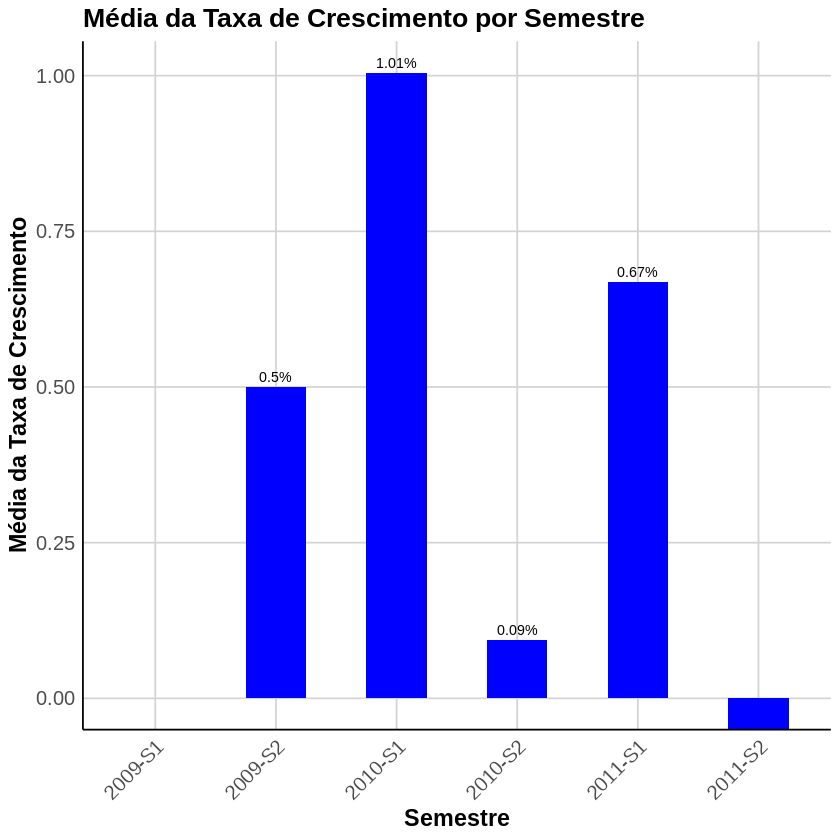

In [ ]:
# Gráfico de cascata da média da taxa de crescimento por semestre
ggplot(media_por_semestre, aes(x = semestre_ano, y = media_taxa_crescimento)) +
  geom_bar(stat = "identity", fill = "blue", width = 0.5) +
  geom_text(aes(label = paste0(round(media_taxa_crescimento, 2), "%")),
            vjust = -0.5, hjust = 0.5, size = 3, color = "black") +
  labs(x = "Semestre", y = "Média da Taxa de Crescimento", title = "Média da Taxa de Crescimento por Semestre") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 16),  # Configurar título
    axis.title = element_text(face = "bold", size = 14),  # Configurar rótulos dos eixos
    axis.text = element_text(size = 12),  # Configurar tamanho dos textos dos eixos
    axis.text.x = element_text(angle = 45, hjust = 1),  # Rotacionar rótulos do eixo x
    panel.grid.major = element_line(color = "lightgray"),  # Adicionar linhas de grade leves
    panel.grid.minor = element_blank(),  # Remover linhas de grade menores
    axis.line = element_line(color = "black"),  # Cor das linhas dos eixos
    axis.ticks = element_blank(),  # Remover ticks dos eixos
    legend.position = "none"  # Remover legenda
  ) +
  coord_cartesian(ylim = c(0, max(media_por_semestre$media_taxa_crescimento) * 1.1))  # Ajustar limite do eixo y



In [ ]:
# Agrupar os dados por mês e calcular a média do taxa_crescimento para cada mês
media_por_mes <- df %>%
  mutate(mes = format(data, "%m")) %>%
  group_by(mes) %>%
  summarize(media_taxa_crescimento = mean(as.numeric(sub("%", "", taxa_crescimento))/100))

media_por_mes

Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `media_taxa_crescimento = mean(as.numeric(sub("%", "",
  taxa_crescimento))/100)`.
ℹ In group 1: `mes = "01"`.
Caused by warning in `mean()`:
! NAs introduced by coercion”


mes,media_taxa_crescimento
<chr>,<dbl>
01,NA
02,0.013766667
03,0.099066667
04,-0.039166667
05,0.010666667
06,-0.001266667
07,0.037166667
08,0.003266667
09,-0.018966667


Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


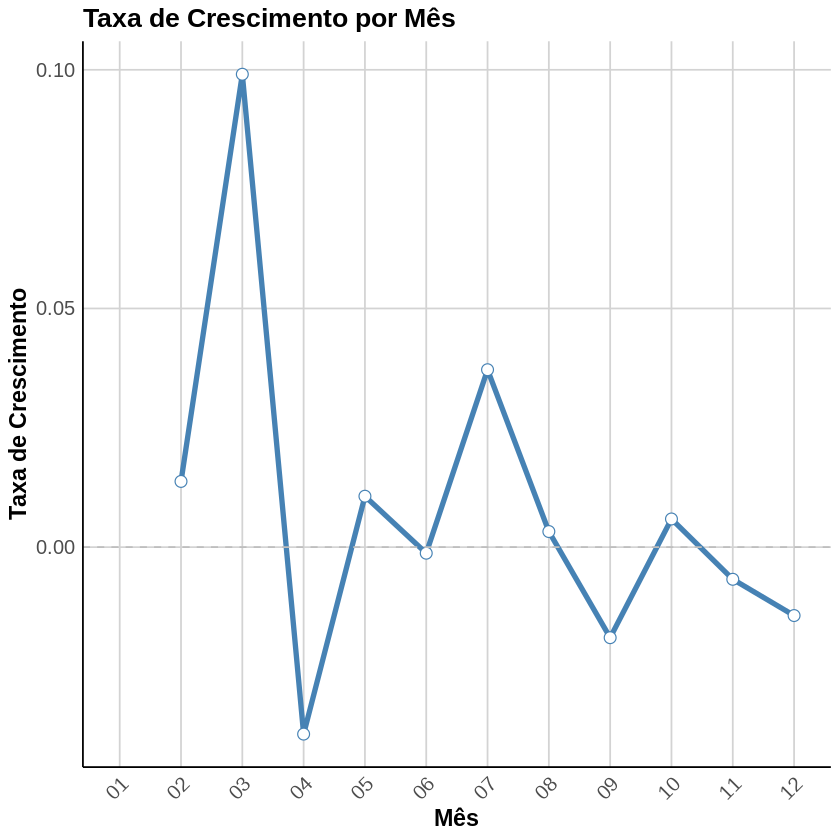

In [ ]:
# Taxa de crescimento por mês
ggplot(media_por_mes, aes(x = mes, y = media_taxa_crescimento, group = 1)) +
  geom_line(color = "steelblue", size = 1.5) +
  geom_point(color = "steelblue", size = 3, shape = 21, fill = "white") +
  labs(x = "Mês", y = "Taxa de Crescimento", title = "Taxa de Crescimento por Mês") +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 16),  # Configurar título
    axis.title = element_text(face = "bold", size = 14),  # Configurar rótulos dos eixos
    axis.text = element_text(size = 12),  # Configurar tamanho dos textos dos eixos
    axis.text.x = element_text(angle = 45, hjust = 1),  # Rotacionar rótulos do eixo x
    panel.grid.major = element_line(color = "lightgray"),  # Adicionar linhas de grade leves
    panel.grid.minor = element_blank(),  # Remover linhas de grade menores
    axis.line = element_line(color = "black"),  # Cor das linhas dos eixos
    axis.ticks = element_blank()  # Remover ticks dos eixos
  ) +
  geom_hline(yintercept = 0, color = "gray", linetype = "dashed")  # Adicionar linha de referência em y = 0


In [ ]:
df <- df %>%
  arrange(df) %>%
  mutate(YoY = (valor / lag(valor, 12) - 1) * 100)

Warning message:
“Removed 12 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”


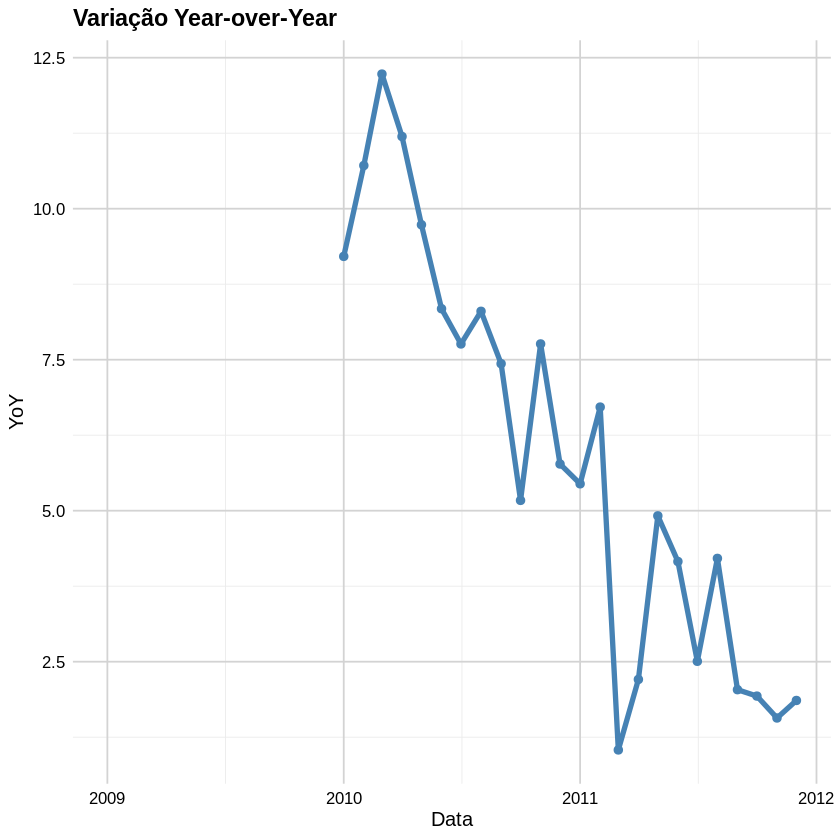

In [ ]:
ggplot(df_, aes(x = data, y = YoY)) +
  geom_line(color = "steelblue", size = 1.5) +
  geom_point(color = "steelblue", size = 2) +
  labs(x = "Data", y = "YoY", title = "Variação Year-over-Year") +
  theme_minimal() +
  theme(
    axis.text = element_text(color = "black", size = 10),
    axis.title = element_text(color = "black", size = 12),
    plot.title = element_text(color = "black", size = 14, face = "bold"),
    panel.grid.major = element_line(color = "lightgray"),
    axis.ticks = element_blank()
  )


In [ ]:
df <- df %>%
  arrange(data) %>%
  mutate(MoM = valor - lag(valor))

In [ ]:
df <- df[-1, ]


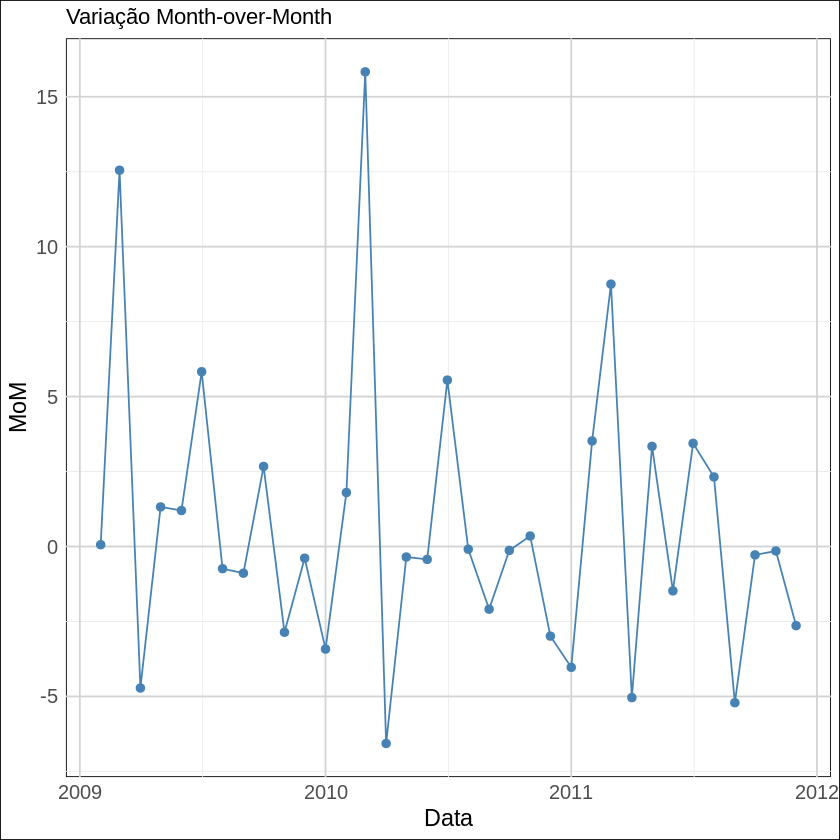

In [ ]:
ggplot(df, aes(x = data, y = MoM)) +
  geom_line(color = "steelblue") +
  geom_point(color = "steelblue", size = 2) +
  labs(x = "Data", y = "MoM", title = "Variação Month-over-Month") +
  theme_minimal() +
  theme(axis.text = element_text(size = 12),
        axis.title = element_text(size = 14),
        panel.grid.major = element_line(color = "lightgray"),
        plot.background = element_rect(fill = "white"),
        panel.background = element_rect(fill = "white"))


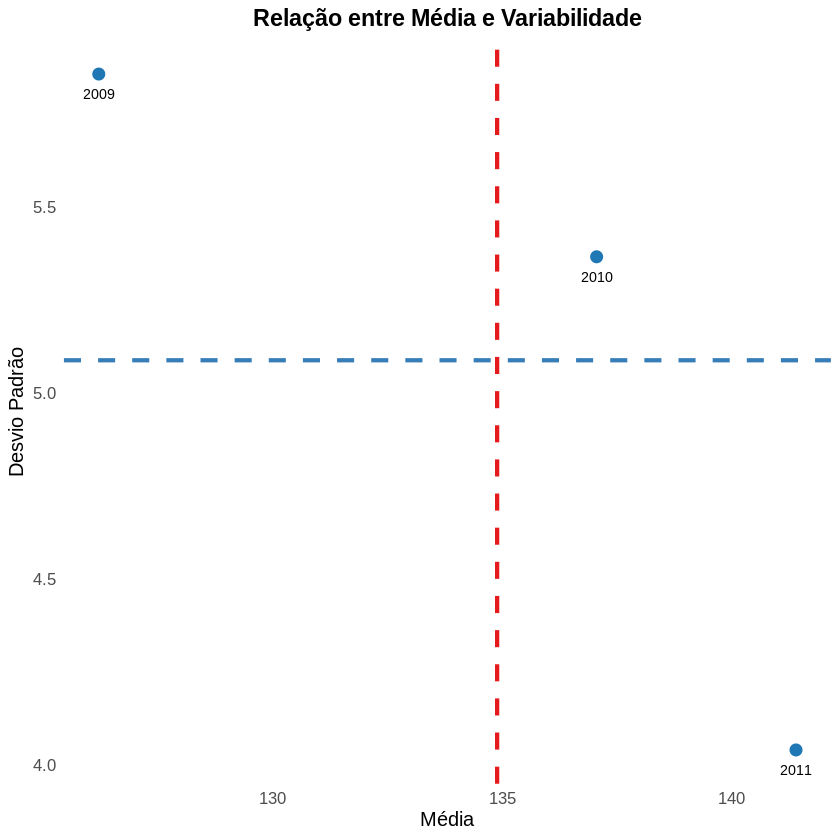

In [ ]:
ggplot(df_estatisticas, aes(x = Media, y = DesvioPadrao)) +
  geom_point(size = 3, color = "#1f78b4") +
  geom_text(aes(label = Ano), hjust = 0.5, vjust = 2.5, size = 3, color = "black") +
  geom_vline(aes(xintercept = mean(Media)), linetype = "dashed", color = "#e41a1c", size = 1.2) +
  geom_hline(aes(yintercept = mean(DesvioPadrao)), linetype = "dashed", color = "#377eb8", size = 1.2) +
  labs(x = "Média", y = "Desvio Padrão") +
  ggtitle("Relação entre Média e Variabilidade") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        legend.position = "none")

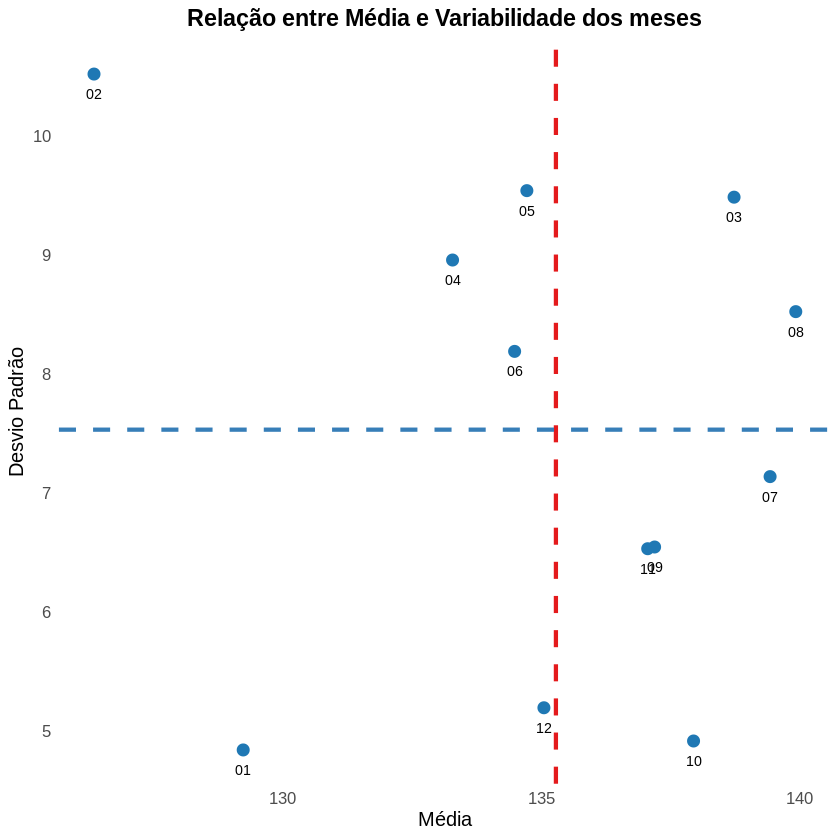

In [ ]:
ggplot(df_estatisticas_mes, aes(x = Media, y = DesvioPadrao)) +
  geom_point(size = 3, color = "#1f78b4") +
  geom_text(aes(label = Mes), hjust = 0.5, vjust = 2.5, size = 3, color = "black") +
  geom_vline(aes(xintercept = mean(Media)), linetype = "dashed", color = "#e41a1c", size = 1.2) +
  geom_hline(aes(yintercept = mean(DesvioPadrao)), linetype = "dashed", color = "#377eb8", size = 1.2) +
  labs(x = "Média", y = "Desvio Padrão") +
  ggtitle("Relação entre Média e Variabilidade dos meses") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        legend.position = "none")

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


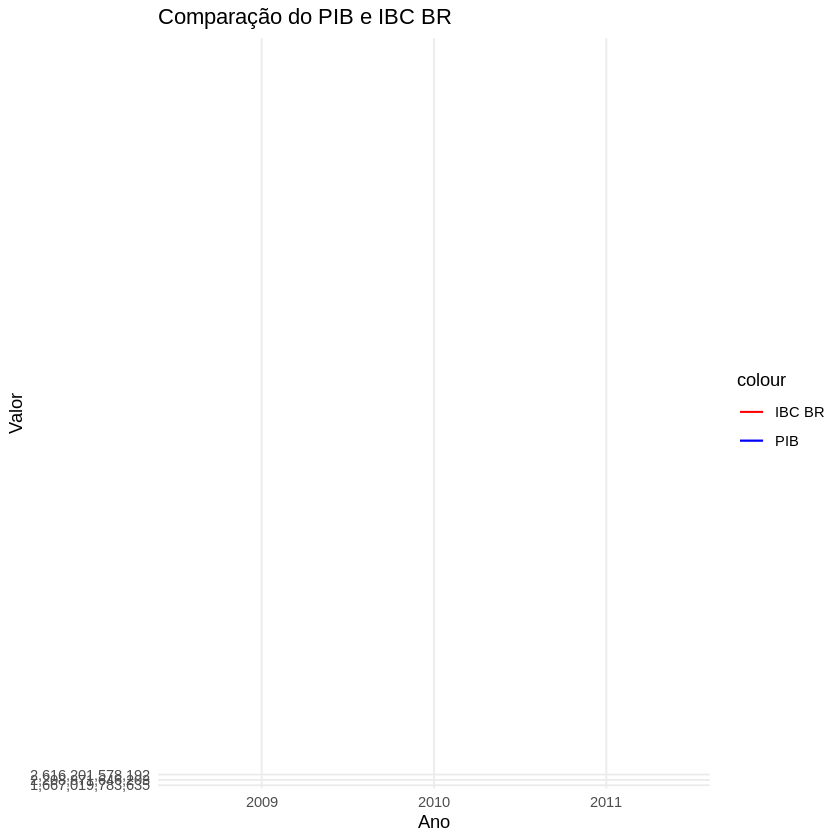

In [ ]:
# Criar um gráfico de linha para comparar o PIB e o IBC BR
ggplot() +
  geom_line(data = df_estatisticas, aes(x = year, y = PIB, color = "PIB")) +
  geom_line(data = df_estatisticas, aes(x = year, y = Media, color = "IBC BR")) +
  labs(x = "Ano", y = "Valor") +
  ggtitle("Comparação do PIB e IBC BR") +
  scale_color_manual(values = c("PIB" = "blue", "IBC BR" = "red")) +
  theme_minimal()